## Importing for packages

In [2]:
# Import these packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom #Read mammogram images stored in DICOM files
import cv2
import random
import os
import seaborn as sns
import h5py
from utility import *
sns.set()

In [2]:
path = r"/Users/isa/Google Drive/cancer-data/"
!ls "{path}"

BenignCalc    BenignMass    MalignantCalc MalignantMass repeat


## Crosschecking files for "black images"

In [86]:
path="/Users/isa/Google Drive/cancer-data/BenignCalc"
img_gen=stacker(path)

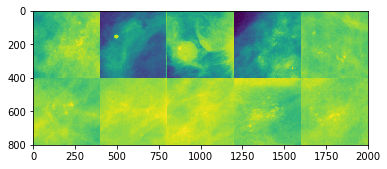

In [81]:
#plt.Axes(fig=(10,16))
plt.imshow(next(img_gen))

In [72]:
path="/Users/isa/Google Drive/cancer-data/MalignantMass"
file=os.path.join(path,'Malignant-mass682')
img=cv2.resize(pydicom.dcmread(file,force=True).pixel_array,(400,400))
plt.imshow(img)

OSError: [Errno 22] Invalid argument

In [60]:
# Number of Images present in each folder
path = r"/Users/isa/Google Drive/cancer-data/"
folder_paths=["MalignantCalc","BenignCalc","MalignantMass","BenignMass"]
sum=0
for x in folder_paths:
    files =!ls "{path}{x}"
    print(x,':',len(files))
    sum+=len(files)
print(sum)

MalignantCalc : 672
BenignCalc : 658
MalignantMass : 786
BenignMass : 967
3083


In [42]:
print(path+files[0])

/Users/isa/Google Drive/cancer-data/Benign-mass1


In [82]:
# Create a dataframe from all the images
path = r"/Users/isa/Google Drive/cancer-data/"
folder_paths=["MalignantCalc","BenignCalc","MalignantMass","BenignMass"]

li=[]
x='BenignMass'
files =!ls "{path}{x}"
MCpath=path+x+"/"
for image_name in files:
    try:
        img=pydicom.dcmread(MCpath+image_name,force=True).pixel_array
    except:
        print(image_name)
    finally:
        li.append([image_name,MCpath+image_name,'BENIGN','MASS',img.shape[0],img.shape[1]])

print(len(li))



967


In [83]:
MC=pd.DataFrame(columns=['name','path','label','calc/mass','length','width'],data=li)
MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
name         967 non-null object
path         967 non-null object
label        967 non-null object
calc/mass    967 non-null object
length       967 non-null int64
width        967 non-null int64
dtypes: int64(2), object(4)
memory usage: 45.4+ KB


In [84]:
MC.to_csv('BM.csv',index=False)

In [7]:
dfBM=pd.read_csv('BM.csv',index_col='name')
display(dfBM.info())
dfBC=pd.read_csv('BC.csv',index_col='name')
dfMC=pd.read_csv('MC.csv',index_col='name')
display(dfBC.info())
display(dfMC.info())

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, Benign-mass1 to Benign-mass99
Data columns (total 5 columns):
path         967 non-null object
label        967 non-null object
calc/mass    967 non-null object
length       967 non-null int64
width        967 non-null int64
dtypes: int64(2), object(3)
memory usage: 45.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, Benign-calc1 to Benign-calc99
Data columns (total 5 columns):
path         658 non-null object
label        658 non-null object
calc/mass    658 non-null object
length       658 non-null int64
width        658 non-null int64
dtypes: int64(2), object(3)
memory usage: 30.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, Malignant-calc1 to Malignant-calc99
Data columns (total 5 columns):
path         672 non-null object
label        672 non-null object
calc/mass    672 non-null object
length       672 non-null int64
width        672 non-null int64
dtypes: int64(2), object(3)
memory usage: 31.5+ KB


None

In [72]:
# Read the CSV which contains Aspect Ratio info
df=pd.read_csv('main_AS.csv',index_col='name')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, Benign-mass1 to Malignant-calc99
Data columns (total 6 columns):
path           2297 non-null object
label          2297 non-null object
calc/mass      2297 non-null object
length         2297 non-null int64
width          2297 non-null int64
aspectratio    2297 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 125.6+ KB


In [116]:
# Benign-mass748
# Benign-mass773
# Removed by creating a Valid column

df=pd.read_csv('main_valid.csv',index_col='name')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, Benign-mass1 to Malignant-calc99
Data columns (total 7 columns):
path           2297 non-null object
label          2297 non-null object
calc/mass      2297 non-null object
length         2297 non-null int64
width          2297 non-null int64
aspectratio    2297 non-null float64
valid          2297 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 127.9+ KB


In [54]:
df_=df[df['calc/mass']=='CALC']
df_=df_.sort_values('aspectratio',ascending=False)
df_r=df_.sort_values('aspectratio')

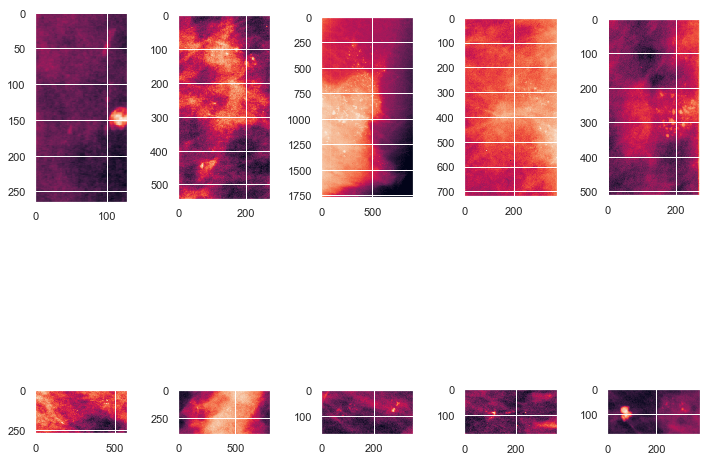

In [117]:
# Display images with largest and smallest aspect ratios
i=3
num_of_images=5
images=df_.iloc[i*num_of_images:i*num_of_images+num_of_images].path.values
images=np.append(images,df_r.iloc[i*num_of_images:i*num_of_images+num_of_images].path.values)
f, axes = plt.subplots(2, 5, figsize=(10, 10))
for i,ax in enumerate(axes.flat):
    ax.imshow(return_image(images[i]),cmap=plt.cm.bone)
f.tight_layout()

## Finding the right sort of images and removing the wrong sort

/Users/isa/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/isa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/Users/isa/Google Drive/cancer-data/MalignantCalc/Malignant-calc190


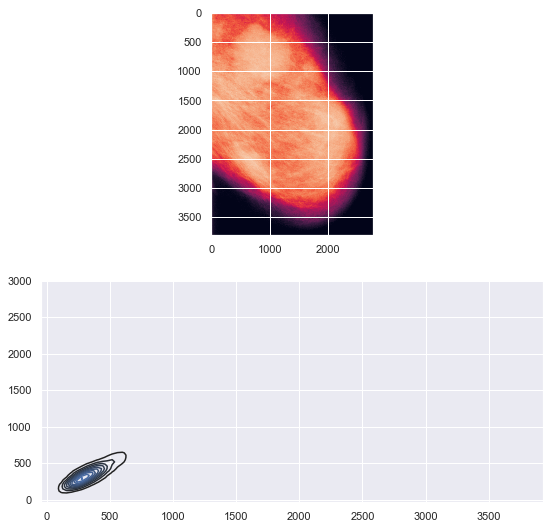

In [81]:
# Benign-mass748
# Benign-mass773
limit=2
sel=df.sort_values(by=['length','width'],ascending=False)[['length','width','path']].iloc[limit:]
f, axes = plt.subplots(2, 1, figsize=(9, 9))
ax=axes.flat
ax[0].imshow(return_image(sel.path.iloc[0]),cmap=plt.cm.bone)
sns.kdeplot(data=sel[['length','width']],ax=ax[1])
print(sel.path.iloc[0])

(array([ 11.,  31., 112., 261., 625., 655., 293., 156.,  49.,  43.,  25.,
          9.,   6.,   5.,   5.,   1.,   3.,   3.,   2.,   2.]),
 array([0.29891957, 0.43174616, 0.56457275, 0.69739933, 0.83022592,
        0.96305251, 1.0958791 , 1.22870569, 1.36153228, 1.49435887,
        1.62718546, 1.76001205, 1.89283864, 2.02566523, 2.15849181,
        2.2913184 , 2.42414499, 2.55697158, 2.68979817, 2.82262476,
        2.95545135]),
 <a list of 20 Patch objects>)

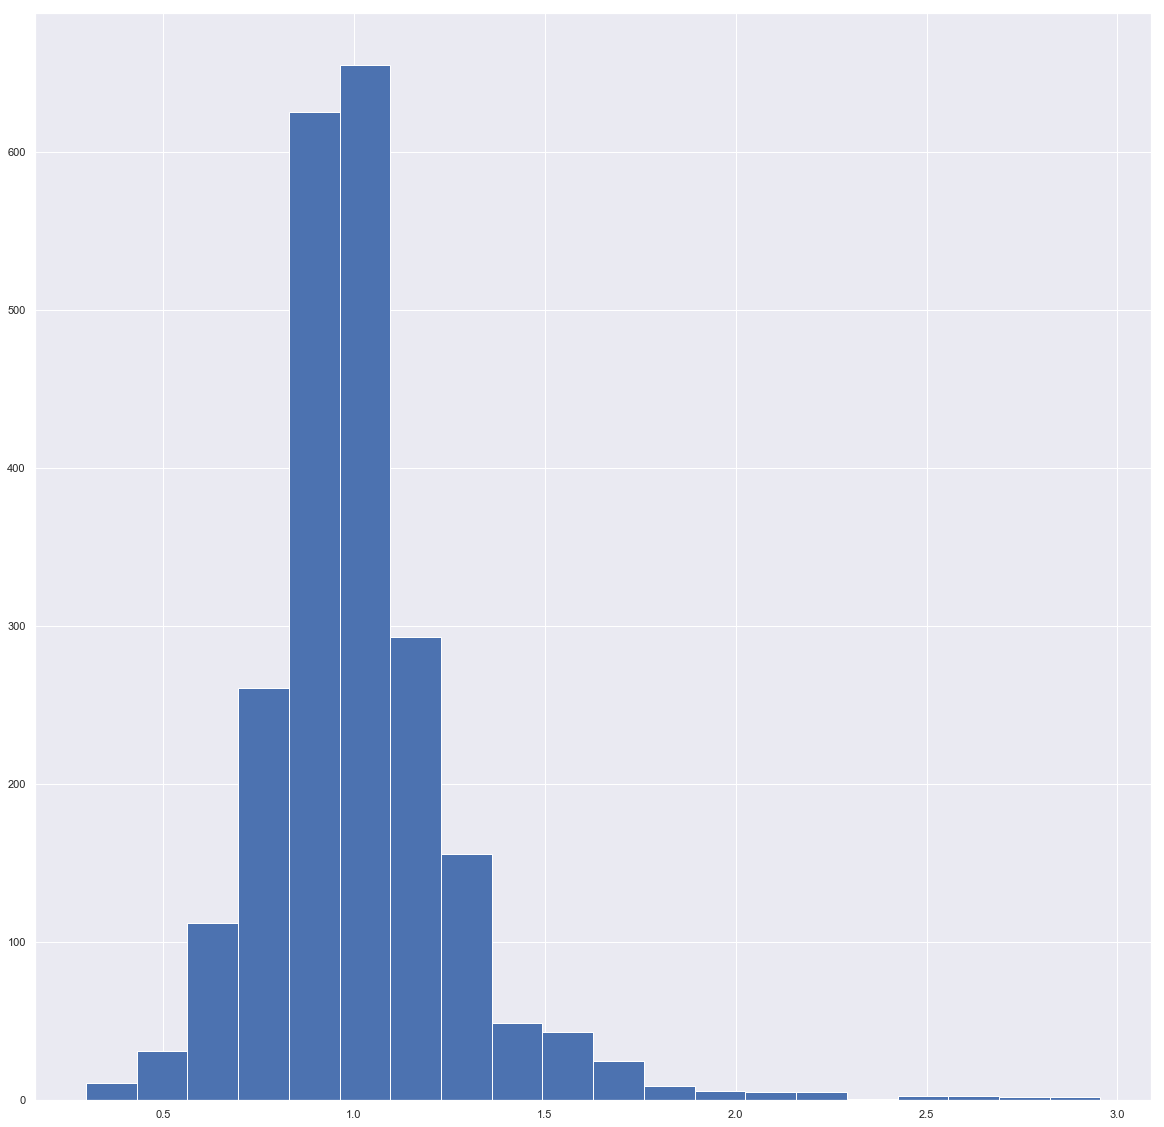

In [132]:
df.aspectratio.values
plt.figure(figsize=(20,20))
plt.hist(df.aspectratio.values,bins=20)

# Picking the dataset

In [56]:
# Don't forget to check VALID images
df = pd.read_csv('main_woMM.csv',index_col='name')
# Experiment 1 with aspect ratios b/w 0.49 and 1.51
# With 1227 images
df1=df[(df.aspectratio<1.51) & (df.aspectratio>0.49) & (df['calc/mass']=='CALC')]

# Random sample 100 cases
df1=df1.sample(10)

# Create another column in the Dataframe to hold the numpy arrays of each image located at their path
df1.loc[:,'arr']=df1.path.apply(lambda x: return_image(x,resize=299).flatten())

# Picking Benign cases
dfb=df1.loc[df1.label=='BENIGN']
img_b=np.vstack(dfb.arr.values)
lbl_b=dfb.label.values.astype('S9')

# Picking Malignant cases
dfm=df1.loc[df1.label=='MALIGNANT']
img_m=np.vstack(dfm.arr.values)
lbl_m=dfm.label.values.astype('S9')

print(img_b.shape,img_m.shape)

(6, 89401) (4, 89401)


In [57]:
# Write and Create a file
with h5py.File("images_1227.hdf5", "w") as f:
    # Create two groups or "subfolders" within my.hdf5 using root group 'f'
    bn=f.create_group('benign')
    mg=f.create_group('malignant')

    # Store each Benign & Malignant datasets within
    dset = bn.create_dataset("images",data=img_b)
    dset = bn.create_dataset("labels",data=lbl_b)
    dset = mg.create_dataset("images",data=img_m)
    dset = mg.create_dataset("labels",data=lbl_m)
    

In [73]:
# Read a file
with h5py.File("images_1227.hdf5", "r") as f:
    b=f['benign']
    img_b=b['images'][...]
    lbl_b=b['labels'][...]
    m=f['malignant']
    img_m=m['images'][...]
    lbl_m=m['labels'][...]
print(img_m.dtype,img_m.shape)

uint16 (4, 89401)


In [158]:
# Modify a file
with h5py.File("my.hdf5", "r+") as f:
    
    dset=f['images']
    dset[...]=img
    dset=f['labels']
    dset[...]=lbl



In [175]:
# Examining the data

img_r.shape
#np.all(img==img_r)

(1227, 89401)

In [76]:
path="/Users/isa/Google Drive/cancer-data/MalignantMass"
"""
Malignant-mass181
Malignant-mass682
"""
file=os.path.join(path,'Malignant-mass181')
ds=pydicom.dcmread(file,force=True)
ds.Columns

3544

In [8]:
#Concatenate all three CSVs
df=pd.concat([dfBM,dfBC,dfMC])
df.to_csv('main_woMM.csv',index=True)